In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
clear_output(wait=True)


In [2]:
import sys
sys.path.append('../../../electric_fish/ActiveZone/electrodynamic/helper_functions')
sys.path.append('../../../electric_fish/ActiveZone/electrodynamic/objects')
sys.path.append('../../../electric_fish/ActiveZone/electrodynamic/uniform_points_generation')


import time
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import h5py

import torch

import torch.nn as nn

from torch.utils.data import DataLoader

from load_data import load_data_full
from NaiveConvNet import NaiveConvNet, TwoPathsNaiveConvNet
from train_naive_convNets_TorchDataset import ElectricImagesDataset

parse_device = lambda device: torch.device(f'cuda:{device[-1]}' if ('gpu' in device.lower()) and (torch.cuda.is_available()) else 'cpu')

In [3]:
dataset = ElectricImagesDataset(N_data_samples_that_fit_in_RAM=40_000)
len(dataset)

Data loaded.


40000

In [4]:
dataset_loader = DataLoader(
    dataset=dataset,
    batch_size=5_000,
    pin_memory=True,
    shuffle=False,
)
len(dataset_loader)

8

In [5]:
in_data, out_data = next(iter(dataset_loader))
in_data.shape, out_data.shape

(torch.Size([5000, 2, 20, 24]), torch.Size([5000, 6]))

In [6]:
start_time = time.time()
for i, (source, targets) in enumerate(dataset_loader):
    end_time = time.time()
    print(i, source.shape, targets.shape, f'{end_time-start_time:.2f}s')
    start_time = end_time
    if i == 7:
        break

0 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.27s
1 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.33s
2 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.25s
3 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.27s
4 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.26s
5 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.27s
6 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.24s
7 torch.Size([5000, 2, 20, 24]) torch.Size([5000, 6]) 0.25s


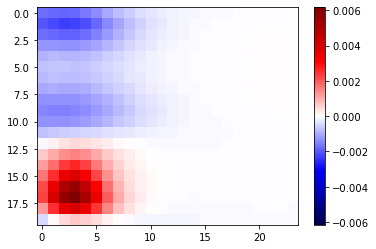

In [7]:
# example_ei = (in_data / self.base_stim)[31,0,:,:24].numpy()
example_ei = in_data[31,0,:,:24].numpy()
vval = np.max(np.abs(example_ei))
plt.imshow(example_ei, cmap='seismic', vmin=-vval, vmax=vval)
plt.colorbar()
plt.show()